# Question 1 - HW5
### Parsa Eissazadeh
#### 97412364

# Setup

In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

# Removing Noise

(-0.5, 1289.5, 814.5, -0.5)

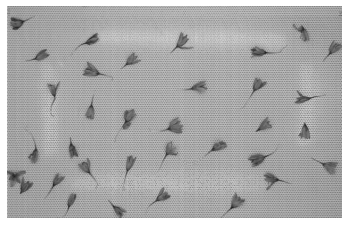

In [ ]:
im = cv2.imread('/content/img_01.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(im , cmap='gray')
plt.axis('off')

In [ ]:
def denoise_image(image):
    """
    Denoises the input image.
    ----------
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result denoised image.   
    """

    denoised = image.copy()
    ########################
    # Your code goes here. #
    ########################

    dft = np.fft.fft2(denoised)
    dft_shifted = np.fft.fftshift(dft)

    dft_shifted[:,735:] = 0
    dft_shifted[:,:555] = 0
    dft_shifted[497:,:] = 0
    dft_shifted[:317,:] = 0

    idft_shift = np.fft.ifftshift(dft_shifted)
    idft = np.fft.ifft2(idft_shift)
    
    denoised = np.real(idft)
    return denoised

True

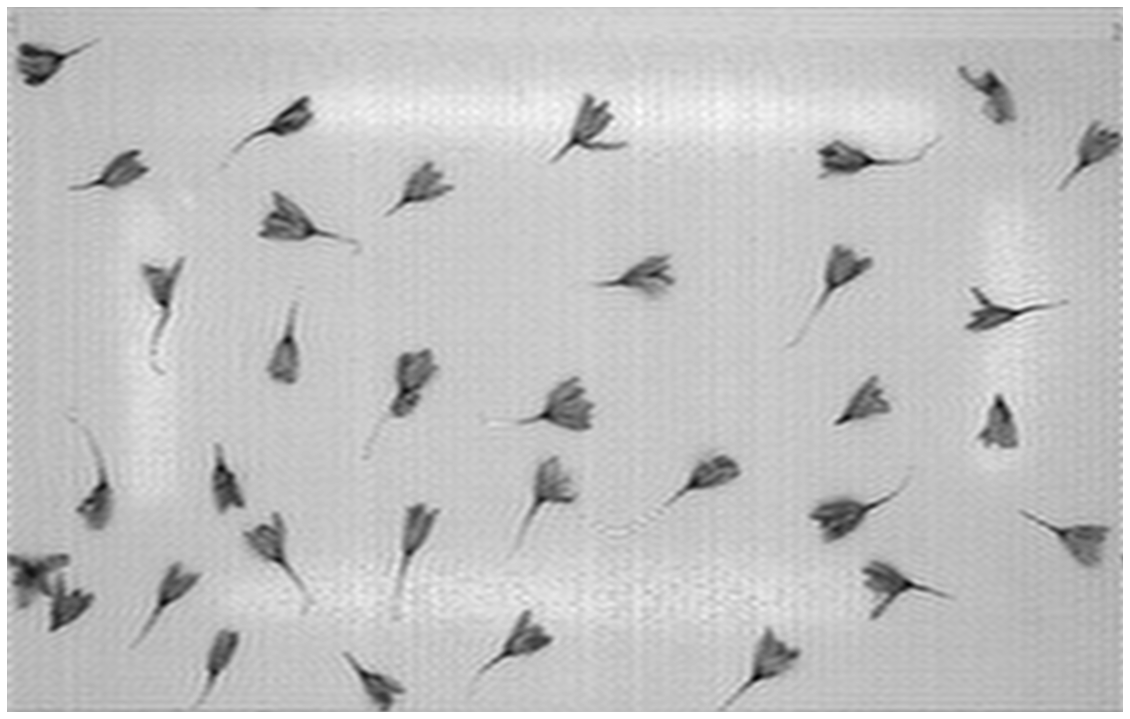

In [ ]:
denoised_image = denoise_image(im)
plt.figure(figsize = (20,30))
plt.imshow(denoised_image, cmap= 'gray')
plt.axis('off')

cv2.imwrite('/content/denoised_image.jpg' , denoised_image)

# Canny edge detector

In [ ]:
denoised_image = cv2.imread('/content/denoised_image.jpg', cv2.IMREAD_GRAYSCALE)
np.where(denoised_image > 10)

(array([  0,   0,   0, ..., 814, 814, 814]),
 array([   0,    1,    2, ..., 1287, 1288, 1289]))

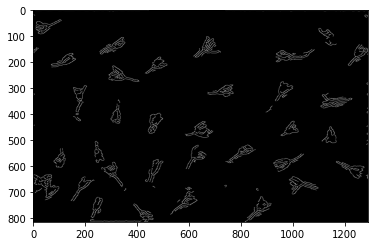

In [ ]:
edges = cv2.Canny(denoised_image,20,70)
plt.imshow(edges,cmap = 'gray') 

# Gradient

In [ ]:
# derivative kernels 
# X axis : 
derivative_kernel_x_axis = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
])

# Y axis :
derivative_kernel_y_axis = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1],
])

In [ ]:
def get_gradient_tetha(image):
  Ix = cv2.filter2D(image, -1, derivative_kernel_x_axis)
  Iy = cv2.filter2D(image, -1, derivative_kernel_y_axis)

  arctan = np.arctan2(Iy, Ix)
  theta = np.array([np.rad2deg(x) for x in arctan])

  return theta

In [ ]:
get_gradient_tetha(im)

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [90.   , 90.   , 90.   , ...,  0.   ,  0.   ,  0.   ],
       [90.   , 90.   , 90.   , ..., 37.7  , 24.16 , 90.   ],
       ...,
       [ 0.   ,  0.   , 90.   , ...,  0.   ,  0.   ,  0.   ],
       [90.   , 90.   , 90.   , ...,  8.695,  4.656, 90.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ]],
      dtype=float16)

# Question 2

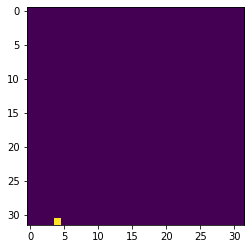

In [32]:
# constructing image 
picture = np.zeros((32,32))
picture[31][4] = 1
plt.imshow(picture)



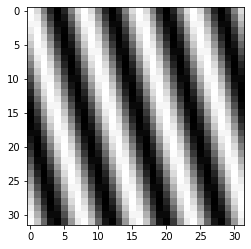

In [33]:
dft = np.fft.fft2(picture)

plt.imshow(dft.real , cmap = 'gray')

# Question 4

(-0.5, 268.5, 411.5, -0.5)

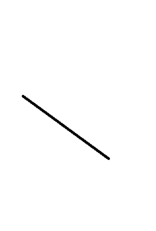

In [ ]:
im = cv2.imread('/content/img_02.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(im , cmap='gray')
plt.axis('off')

In [ ]:
# extract parameters 
xs , ys = np.where(im < 255)

x_avg = np.average(xs)
y_avg = np.average(ys)
xy_avg = np.average(xs*ys)
xx_avg = np.average(xs**2)

In [ ]:
# compute m
m = (x_avg*y_avg - xy_avg) / (x_avg**2 - xx_avg)
m

1.3709995907272559

In [ ]:
# compute c
c = y_avg - m * x_avg
c

-202.96710625458064